## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

BX in orbit: 3563
fraction of lines I am using: 0.839233 percent
TDC_CHANNEL: 139 frequency: 466
TDC_CHANNEL: 63 frequency: 287
TDC_CHANNEL: 64 frequency: 264
TDC_CHANNEL
1      139
2      139
3      114
4      128
5       81
      ... 
123     81
124     79
127      7
128      6
139    466
Length: 127, dtype: int64


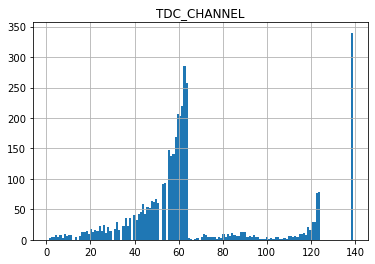

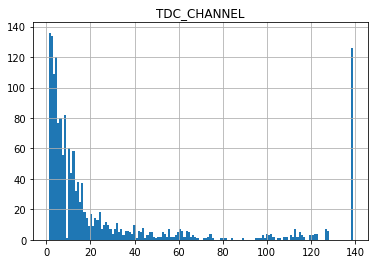

In [29]:
#Creating the Data Frame
content = pd.read_csv('C:\\Users\Luca\data\data_000637.txt', nrows = 11000)
df = pd.DataFrame(content)
#print(df[0:50])

#finding 'x' value
x = df['BX_COUNTER'].max()#- df['BX_COUNTER'].min()
print('BX in orbit:',x)

#data lasted
l_content = pd.read_csv('C:\\Users\Luca\data\data_000637.txt')
print('fraction of lines I am using: %f percent' %(100  *11000/len(l_content)))

#creating a new column
time = df['BX_COUNTER']*25 + df['ORBIT_CNT']*x*25 + df['TDC_MEAS']*25/30
df['time[ns]'] = time

#replacing data
np.random.seed(10)
df['HEAD'] = np.random.randint(0,2,len(df))

#filtering data
ndf = df[df['HEAD'] == 1]
#from now on I will perform the operations on ndf dataframe

#occupacy plots
ndf[ndf.FPGA == 0].hist(column ='TDC_CHANNEL', bins = 140)
ndf[ndf.FPGA == 1].hist('TDC_CHANNEL', bins = 140)
#print(len(ndf[ndf.TDC_CHANNEL == 139])) 

#noisy channels
gndf = pd.DataFrame(ndf.groupby(by = 'TDC_CHANNEL'))

noisy = []
for i in range(0,gndf.shape[0]):
    noisy.append([len(gndf.values[i][1]),gndf.values[i][1]['TDC_CHANNEL'].values[0]]) #attenzione i + 1 non mi dà il valore di TDC_CHANNEL
 
noisy = sorted(noisy)

for i in range(0,3):
    print('TDC_CHANNEL:', noisy[len(noisy) - 1 - i][1] ,'frequency:', noisy[len(noisy) - 1 - i][0])
#print(ndf.groupby('TDC_CHANNEL').size())

#unique orbits
print(ndf.groupby('TDC_CHANNEL').size())